In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import Input,Dropout,Dense

In [12]:
from tensorflow.keras.models import Model

In [13]:
from tensorflow.keras import regularizers

In [18]:
from tensorflow.keras.utils import get_file

In [19]:
from sklearn import metrics

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.naive_bayes import BernoulliNB 

In [22]:
from sklearn import tree

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.feature_selection import RFE

In [27]:
import itertools

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.preprocessing import OneHotEncoder 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

In [32]:
nrows=20000

In [33]:
df1 = pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", nrows=nrows)

In [34]:
df2=pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", nrows=nrows)

In [35]:
df3=pd.read_csv("Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv", nrows=nrows)

In [36]:
df4=pd.read_csv("Dataset/Monday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [37]:
df5=pd.read_csv("Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", nrows=nrows)

In [38]:
df6=pd.read_csv("Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", nrows=nrows)

In [39]:
df7=pd.read_csv("Dataset/Tuesday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [40]:
df8=pd.read_csv("Dataset/Wednesday-workingHours.pcap_ISCX.csv", nrows=nrows)

In [41]:
df = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8])

In [42]:
del df1,df2, df3, df4,df5,df6,df7,df8

In [43]:
nRow, nCol = df.shape
print(f'Rows {nRow} Columns {nCol} ')

Rows 160000 Columns 79 


In [44]:
df = df.dropna()

In [45]:
df.columns = df.columns.str.strip()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159971 entries, 0 to 19999
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             159971 non-null  int64  
 1   Flow Duration                159971 non-null  int64  
 2   Total Fwd Packets            159971 non-null  int64  
 3   Total Backward Packets       159971 non-null  int64  
 4   Total Length of Fwd Packets  159971 non-null  int64  
 5   Total Length of Bwd Packets  159971 non-null  int64  
 6   Fwd Packet Length Max        159971 non-null  int64  
 7   Fwd Packet Length Min        159971 non-null  int64  
 8   Fwd Packet Length Mean       159971 non-null  float64
 9   Fwd Packet Length Std        159971 non-null  float64
 10  Bwd Packet Length Max        159971 non-null  int64  
 11  Bwd Packet Length Min        159971 non-null  int64  
 12  Bwd Packet Length Mean       159971 non-null  float64
 13  

In [47]:
df = df[["Destination Port", "Flow Duration", "Total Fwd Packets", 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets', 'Subflow Bwd Bytes','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward',"Label"]]

In [48]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,54865,3,2,0,12,0,2,12,0,0,-1,1,20,BENIGN
1,55054,109,1,1,6,6,1,6,1,6,256,0,20,BENIGN
2,55055,52,1,1,6,6,1,6,1,6,256,0,20,BENIGN
3,46236,34,1,1,6,6,1,6,1,6,329,0,20,BENIGN
4,54863,3,2,0,12,0,2,12,0,0,-1,1,20,BENIGN


In [52]:
train, test=train_test_split(df,test_size=0.3, random_state=10)

In [53]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,111979.000000,1.119790e+05,111979.000000,111979.000000,1.119790e+05,1.119790e+05,111979.000000,1.119790e+05,111979.000000,1.119790e+05,111979.000000,111979.000000,1.119790e+05
mean,6494.030282,1.622033e+07,55.430125,70.809393,9.831983e+02,1.479465e+05,55.430125,9.831983e+02,70.809393,1.479402e+05,2385.794470,40.695354,-2.739320e+04
std,16487.671739,3.474315e+07,2815.917355,3754.943312,1.628182e+04,8.378252e+06,2815.917355,1.628182e+04,3754.943312,8.378163e+06,9438.538412,2462.125431,3.314581e+06
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,0.000000,-5.368707e+08
25%,53.000000,2.210000e+02,2.000000,1.000000,3.700000e+01,6.000000e+00,2.000000,3.700000e+01,1.000000,6.000000e+00,-1.000000,0.000000,2.000000e+01
50%,80.000000,6.015300e+04,2.000000,2.000000,7.400000e+01,1.460000e+02,2.000000,7.400000e+01,2.000000,1.460000e+02,-1.000000,1.000000,2.000000e+01
75%,443.000000,5.526681e+06,7.000000,5.000000,4.210000e+02,7.360000e+02,7.000000,4.210000e+02,5.000000,7.360000e+02,245.000000,3.000000,3.200000e+01
max,64628.000000,1.200000e+08,219759.000000,291922.000000,1.323378e+06,6.554530e+08,219759.000000,1.323378e+06,291922.000000,6.554530e+08,65535.000000,213557.000000,6.000000e+01


In [54]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,47992.000000,4.799200e+04,47992.000000,47992.000000,4.799200e+04,4.799200e+04,47992.000000,4.799200e+04,47992.000000,4.799200e+04,47992.000000,47992.000000,4.799200e+04
mean,6464.889752,1.596356e+07,47.776984,60.874354,9.051809e+02,1.239687e+05,47.776984,9.051809e+02,60.874354,1.239650e+05,2381.055863,37.336889,-2.864099e+04
std,16468.830277,3.453546e+07,2737.862647,3660.747689,1.582188e+04,8.053672e+06,2737.862647,1.582188e+04,3660.747689,8.053340e+06,9391.811512,2456.169322,2.733379e+06
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,0.000000,-5.368707e+08
25%,53.000000,2.230000e+02,2.000000,1.000000,3.700000e+01,6.000000e+00,2.000000,3.700000e+01,1.000000,6.000000e+00,-1.000000,0.000000,2.000000e+01
50%,80.000000,6.051650e+04,2.000000,2.000000,7.350000e+01,1.460000e+02,2.000000,7.350000e+01,2.000000,1.460000e+02,-1.000000,1.000000,2.000000e+01
75%,443.000000,5.465720e+06,7.000000,5.000000,4.230000e+02,6.900000e+02,7.000000,4.230000e+02,5.000000,6.900000e+02,246.000000,3.000000,3.200000e+01
max,64383.000000,1.200000e+08,218658.000000,291260.000000,1.286884e+06,6.410014e+08,218658.000000,1.286884e+06,291260.000000,6.410014e+08,65535.000000,207501.000000,6.000000e+01


In [55]:
train['Label'].value_counts()
test['Label'].value_counts()

BENIGN                      47261
FTP-Patator                   368
DDoS                          339
Web Attack � Brute Force       21
PortScan                        3
Name: Label, dtype: int64

In [56]:
scaler = StandardScaler()

In [57]:
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [58]:
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [59]:
onehotencoder = OneHotEncoder() 

In [60]:
trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [61]:
train_X=sc_traindf
train_y=trainDep[:,0]

In [62]:
test_X=sc_testdf
test_y=testDep[:,0]

In [63]:
rfc = RandomForestClassifier()

In [64]:
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [65]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<Axes: xlabel='feature'>

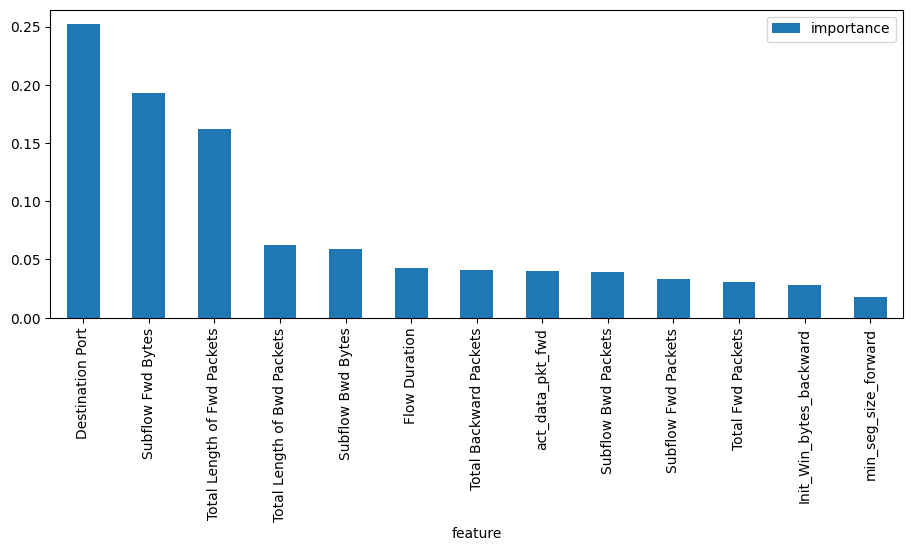

In [66]:
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [67]:
rfc = RandomForestClassifier()

In [68]:
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

In [69]:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]

In [70]:
selected_features = [v for i, v in feature_map if i==True]

In [71]:
selected_features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward']

In [72]:
a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [74]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [75]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [76]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [77]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

In [79]:
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

2024-04-16 18:07:21,952 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:07:22,001 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:07:22,024 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9842189218132289

Model Accuracy:
 0.9842189194361166

Confusion matrix:
 [[    0  1237]
 [    0 77148]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1237
         1.0       0.98      1.00      0.99     77148

    accuracy                           0.98     78385
   macro avg       0.49      0.50      0.50     78385
weighted avg       0.97      0.98      0.98     78385



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9990687197090748

Model Accuracy:
 1.0

Confusion matrix:
 [[ 1237     0]
 [    0 77148]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1237
         1.0       1.00      1.00      1.00  

2024-04-16 18:08:01,913 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:01,959 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:01,985 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9842189218132289

Model Accuracy:
 0.9842189194361166

Confusion matrix:
 [[    0  1237]
 [    0 77148]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1237
         1.0       0.98      1.00      0.99     77148

    accuracy                           0.98     78385
   macro avg       0.49      0.50      0.50     78385
weighted avg       0.97      0.98      0.98     78385




In [80]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        

2024-04-16 18:08:02,056 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:02,078 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:02,090 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9836577960350062

Confusion matrix:
 [[    0   549]
 [    0 33045]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       549
         1.0       0.98      1.00      0.99     33045

    accuracy                           0.98     33594
   macro avg       0.49      0.50      0.50     33594
weighted avg       0.97      0.98      0.98     33594



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.999226052271239

Confusion matrix:
 [[  537    12]
 [   14 33031]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       549
         1.0       1.00      1.00      1.00     33045

    accuracy                           1.00     33594
   macro avg      

2024-04-16 18:08:10,072 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:10,094 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-16 18:08:10,105 [6244] WARNING  py.warnings:109: [JupyterRequire] D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9990176817288802

Confusion matrix:
 [[  531    18]
 [   15 33030]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       549
         1.0       1.00      1.00      1.00     33045

    accuracy                           1.00     33594
   macro avg       0.99      0.98      0.98     33594
weighted avg       1.00      1.00      1.00     33594



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9836577960350062

Confusion matrix:
 [[    0   549]
 [    0 33045]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       549
         1.0       0.98      1.00      0.99     33045

    accuracy                           0.98     33594
   macro avg       0.49 

In [81]:
def getModel():
    inp = Input(shape=(X_train.shape[1],))
    d1=Dropout(0.3)(inp)
    encoded = Dense(8, activation='relu', activity_regularizer=regularizers.l1(10e-5))(d1)
    decoded = Dense(X_train.shape[1], activation='relu')(encoded)
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return autoencoder

In [82]:
autoencoder=getModel()

In [83]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [84]:
history=autoencoder.fit(X_train, Y_train,
               epochs=32,
                batch_size=150,
                shuffle=True,
                validation_split=0.1, callbacks=[callback]
                       )

Epoch 1/32
471/471 [==============================] - 2s 3ms/step - loss: 1.1062 - accuracy: 0.8359 - val_loss: 0.2257 - val_accuracy: 0.9841
Epoch 2/32
471/471 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9826 - val_loss: 0.2244 - val_accuracy: 0.9843
Epoch 3/32
471/471 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9828 - val_loss: 0.2233 - val_accuracy: 0.9844
Epoch 4/32
471/471 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9828 - val_loss: 0.1407 - val_accuracy: 0.9846
Epoch 5/32
471/471 [==============================] - 0s 1ms/step - loss: 0.1662 - accuracy: 0.9832 - val_loss: 0.0739 - val_accuracy: 0.9846
Epoch 6/32
471/471 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.9835 - val_loss: 0.1037 - val_accuracy: 0.9844
Epoch 7/32
471/471 [==============================] - 1s 1ms/step - loss: 0.1194 - accuracy: 0.9836 - val_loss: 0.0880 - val_accuracy: 0.9846
Epoch 

Text(0.5, 0, 'epoch')

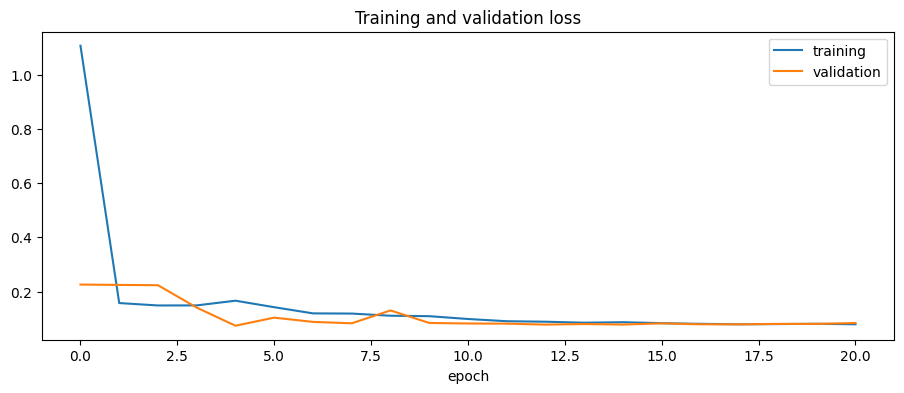

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

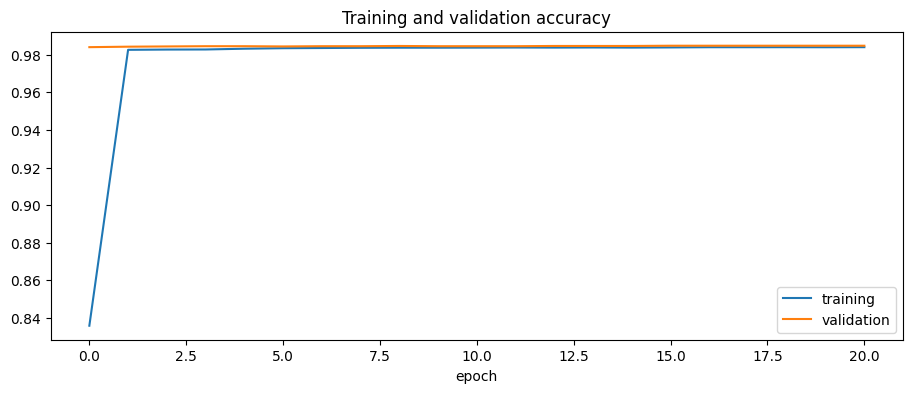

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')